In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.ma as ma

40 10


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


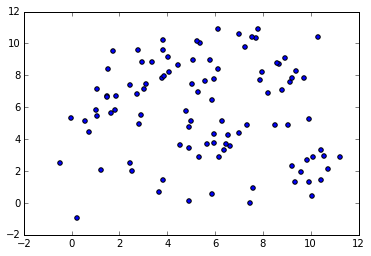

In [45]:
size = 200
points = np.array([np.cos(np.sqrt(x))+ np.random.random_integers(10) + np.sin(x) for x in range(size)]).reshape(size/2,2)
plt.scatter(points[:,0],points[:,1])
neighbours = int(0.2 * size)
k_nearest = int(0.05 * size)
print(neighbours, k_nearest)

In [46]:
neigh = NearestNeighbors()
neigh.fit(points)
distances, indices = neigh.kneighbors(points,neighbours)
outliers = []

In [59]:
distances_partial = distances[:,1:k_nearest+1]
distances_vector = distances_partial.sum(1)
distances_vector

array([ 10.46659449,  11.5410179 ,  20.28313973,  12.6893418 ,
        18.44712704,  25.08509619,   0.        ,  10.64032093,
        10.17168326,   9.82386621,   8.30206979,  12.14928842,
        12.52091576,  13.74744889,  17.30411126,  13.88964971,
        10.03723734,  23.81834524,   9.10870735,  13.1721228 ,
        11.04330413,  12.67390096,   7.68335871,  12.84294947,
         9.59546285,  13.15379709,  10.55136421,  11.7906402 ,
         9.44526905,  13.77902574,  12.49617412,   0.        ,
        13.98407529,  12.57057328,  16.84714465,  25.28482954,
        24.10195211,  11.90307005,  14.3175716 ,  10.60658905,
        10.71724113,  13.50791405,   9.96791595,   9.79041901,
        18.71840527,  25.16008831,   0.        ,  15.45143363,
        11.4899709 ,  13.12549806,   9.97811507,  14.88293137,
        16.07692983,   8.56234465,  13.17842352,   9.42955868,
        19.39688314,   7.85038868,  11.21975357,  22.73695259,
        24.5191564 ,  13.94991435,  10.13314742,   8.40

In [60]:
outlier = distances_vector.argmax()
outliers.append(outlier)
outliers

[46, 6, 31, 35]

In [61]:
print(distances)
distances[outlier] = np.zeros(neighbours)
for i, row in enumerate(indices):
    if outlier in row:
        distances[i][np.where(row==outlier)[0][0]] = 1000
        distances[i].sort()
print(distances)

[[  0.00000000e+00   4.63840868e-01   6.27248326e-01 ...,   3.97530426e+00
    3.99835649e+00   4.08831919e+00]
 [  0.00000000e+00   7.02405076e-01   7.14728273e-01 ...,   3.78845440e+00
    3.83274922e+00   3.86310079e+00]
 [  0.00000000e+00   7.55027089e-01   1.41192639e+00 ...,   1.00000000e+03
    1.00000000e+03   1.00000000e+03]
 ..., 
 [  0.00000000e+00   1.17186898e+00   1.33552746e+00 ...,   4.48801282e+00
    4.63484624e+00   4.75779414e+00]
 [  0.00000000e+00   3.11965033e-01   4.93943747e-01 ...,   5.42730533e+00
    5.50027627e+00   5.50557155e+00]
 [  0.00000000e+00   3.70552569e-01   6.17677012e-01 ...,   3.65982705e+00
    3.67828693e+00   3.81762155e+00]]
[[  0.00000000e+00   4.63840868e-01   6.27248326e-01 ...,   3.97530426e+00
    3.99835649e+00   4.08831919e+00]
 [  0.00000000e+00   7.02405076e-01   7.14728273e-01 ...,   3.78845440e+00
    3.83274922e+00   3.86310079e+00]
 [  0.00000000e+00   7.55027089e-01   1.41192639e+00 ...,   1.00000000e+03
    1.00000000e+03   

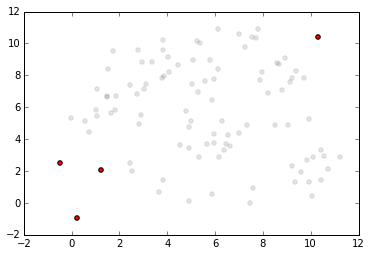

In [62]:
plt.scatter(points[:,0],points[:,1], c = 'black', alpha = 0.1)
out = np.array(outliers)
plt.scatter(points[out][:,0],points[out][:,1],c='red')

array([[ 0.98455017,  1.33322022,  1.39042387,  1.43540569],
       [ 0.17276196,  1.30001181,  1.30515446,  1.43540569],
       [ 0.98455017,  1.44864689,  1.46137526,  2.11971401],
       [ 0.86042183,  1.1302475 ,  1.30001181,  1.38520698],
       [ 0.43450651,  0.78183356,  1.07447044,  1.11173257],
       [ 0.17276196,  1.1302475 ,  1.26905128,  1.33322022],
       [ 0.64938977,  0.86042183,  1.11173257,  1.16904908],
       [ 0.64243264,  0.65175738,  0.73186157,  0.80034099],
       [ 0.43450651,  1.16904908,  1.18208953,  1.26905128],
       [ 0.55887222,  0.64938977,  1.07447044,  1.09528229],
       [ 0.45882009,  0.75369222,  0.8245187 ,  0.90306864],
       [ 0.65175738,  0.78183356,  1.12539605,  1.14554717],
       [ 0.53741336,  0.55887222,  0.86511966,  1.09500229],
       [ 0.65036045,  0.8245187 ,  0.83769586,  1.15171106],
       [ 0.73186157,  0.75369222,  0.90322608,  1.07231757],
       [ 0.53741336,  0.55791343,  0.64243264,  1.00103973],
       [ 0.5015061 ,  0.

In [108]:
class Pair:
    
    def __init__(self,points):
        self.points = points
        self.n_of_outliers = int(0.15*self.points.shape[0])
        self.neigh = NearestNeighbors()
        self.neigh.fit(self.points)

        
    def find_outliers_knn(self, k_nearest):
        
        distances, indices = self.neigh.kneighbors(self.points,
                                              k_nearest + self.n_of_outliers)
        self.outliers = []

        for each in range(self.n_of_outliers):
            print(self.n_of_outliers- each, end="; ", flush=True)
            distances_partial = distances[:,1:k_nearest+1]
            distances_vector = distances_partial.sum(1)
            outlier = distances_vector.argmax()
            self.outliers.append(outlier)

            distances[outlier] = np.zeros(k_nearest + self.n_of_outliers)

            for i, row in enumerate(indices):
                if outlier in row:
                    distances[i][np.where(row==outlier)[0][0]] = 1000
                    distances[i].sort()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


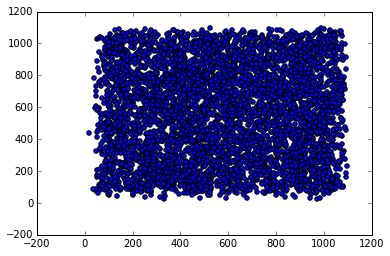

In [109]:
size = 10000
points = np.array([np.random.random_integers(size/10) + np.sqrt(x) for x in range(size)]).reshape(size/2,2)
plt.scatter(points[:,0],points[:,1])
nearest = int(size*0.02)

In [111]:
p = Pair(points)
p.n_of_outliers

750

In [112]:
p.find_outliers_knn(nearest)

-750; -749; -748; -747; -746; -745; -744; -743; -742; -741; -740; -739; -738; -737; -736; -735; -734; -733; -732; -731; -730; -729; -728; -727; -726; -725; -724; -723; -722; -721; -720; -719; -718; -717; -716; -715; -714; -713; -712; -711; -710; -709; -708; -707; -706; -705; -704; -703; -702; -701; -700; -699; -698; -697; -696; -695; -694; -693; -692; -691; -690; -689; -688; -687; -686; -685; -684; -683; -682; -681; -680; -679; -678; -677; -676; -675; -674; -673; -672; -671; -670; -669; -668; -667; -666; -665; -664; -663; -662; -661; -660; -659; -658; -657; -656; -655; -654; -653; -652; -651; -650; -649; -648; -647; -646; -645; -644; -643; -642; -641; -640; -639; -638; -637; -636; -635; -634; -633; -632; -631; -630; -629; -628; -627; -626; -625; -624; -623; -622; -621; -620; -619; -618; -617; -616; -615; -614; -613; -612; -611; -610; -609; -608; -607; -606; -605; -604; -603; -602; -601; -600; -599; -598; -597; -596; -595; -594; -593; -592; -591; -590; -589; -588; -587; -586; -585; -584

In [93]:
print(p.outliers)

[2176, 1603, 3324, 949, 4411, 2790, 4118, 3931, 4834, 984, 1961, 46, 2404, 1260, 2107, 2195, 3668, 3609, 2170, 838, 3093, 3356, 4458, 346, 4152, 2435, 3842, 2055, 612, 127, 1771, 3880, 4509, 1740, 4421, 1593, 704, 1609, 4970, 2328, 485, 4774, 2407, 331, 167, 3021, 4149, 1970, 3899, 500, 170, 1802, 4996, 302, 710, 3078, 3621, 4439, 4481, 3896, 2204, 2185, 2647, 834, 2553, 43, 695, 2454, 825, 3580, 1758, 4252, 1018, 2360, 2569, 1790, 2891, 4749, 2429, 4418, 3037, 238, 3081, 4746, 1768, 4225, 1406, 3084, 2198, 580, 4127, 4199, 4196, 2141, 2135, 4837, 1077, 4058, 2242, 2110, 2186, 848, 320, 2189, 128, 1990, 2866, 4271, 2828, 1012, 3934, 491, 3665, 176, 63, 388, 4137, 2132, 2391, 2875, 1606, 2002, 736, 3422, 343, 1314, 4588, 3561, 2666, 3902, 3215, 3740, 1707, 2556, 4092, 4759, 2531, 4592, 794, 4121, 2638, 1739, 3990, 1466, 1381, 2663, 1123, 3630, 1412, 395, 4695, 2229, 962, 4787, 4790, 3156, 3527, 3087, 4161, 3412, 2847, 1298, 4493, 2133, 965, 726, 1945, 4514, 4885, 1008, 2070, 614, 1587, 

In [113]:
int("n")

ValueError: invalid literal for int() with base 10: 'n'